### 🎵 Amazon Music Clustering Project

##### 1. IMPORT REQUIRED LIBRARIES

In [17]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Clustering Algorithms
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Evaluation Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

##### 2. LOAD DATASET

In [2]:
# Load the Amazon Music dataset
df = pd.read_csv(r"C:\Users\KAVIYA V\Downloads\single_genre_artists.csv")

# View first 5 rows
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


##### 3. DATA EXPLORATION

In [3]:
df.head()                    # Preview first few rows
df.shape                     # Dataset dimensions
df.info()                    # Structure and datatypes
df.dtypes                    # Column data types
df.isnull().sum()            # Check missing values
df.duplicated().sum()        # Check duplicate rows
df.describe()                # Statistical summary
df.select_dtypes(include='object').columns  # Text columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

Index(['id_songs', 'name_song', 'id_artists', 'release_date', 'genres',
       'name_artists'],
      dtype='object')

##### 4. DATA PREPROCESSING

In [4]:
# Drop unnecessary ID and text columns
df.drop([
    'id_songs', 'name_song', 'id_artists',
    'release_date', 'genres', 'name_artists'
], axis=1, inplace=True)

##### 5. FEATURE SELECTION

In [5]:
# Audio features representing song characteristics
recommended_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

# Extract selected features
X = df[recommended_features]

##### 6. FEATURE NORMALIZATION

In [6]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(
    X_scaled,
    columns=recommended_features,
    index=X.index
)

df_scaled.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.153476,-1.511128,-0.757909,-0.427109,1.616187,-0.353338,0.538584,0.321287,0.515005,-0.401735
1,-1.028518,-1.528056,-1.098629,-0.369741,1.604081,-0.353405,-0.521537,-0.577455,-1.294487,0.124906
2,-0.488051,-1.418027,-1.127899,-0.398062,1.622240,-0.353405,1.039046,-0.375943,-1.560003,-0.003949
3,0.573581,-0.313510,-0.470677,-0.013914,1.610134,-0.353405,-0.031836,0.611464,0.405268,-0.397437
4,0.406294,-1.028695,-0.768227,-0.111948,1.610134,-0.353405,0.796887,1.087031,-1.377593,-0.346143


##### 7. K-MEANS CLUSTERING

In [7]:
# ----- Elbow Method -----
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

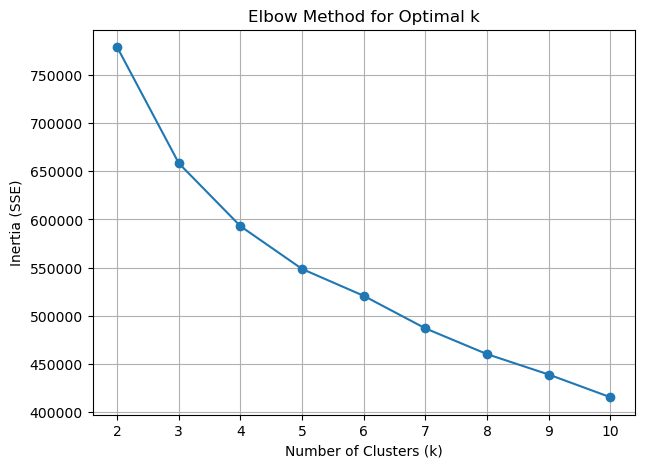

In [8]:
# Plot Elbow Curve
plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [9]:
# ----- Silhouette Score -----
sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels, sample_size=1000, random_state=42)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

k = 2, Silhouette Score = 0.2086
k = 3, Silhouette Score = 0.2465
k = 4, Silhouette Score = 0.2335
k = 5, Silhouette Score = 0.2045
k = 6, Silhouette Score = 0.1616
k = 7, Silhouette Score = 0.2049
k = 8, Silhouette Score = 0.1713
k = 9, Silhouette Score = 0.1722
k = 10, Silhouette Score = 0.1783


In [10]:
# Choose optimal k (based on elbow + silhouette)
k_optimal = 3

In [11]:
# Fit final KMeans model
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans_final.fit_predict(X_scaled)

##### 8. PCA FOR VISUALIZATION

In [12]:
# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X_scaled)

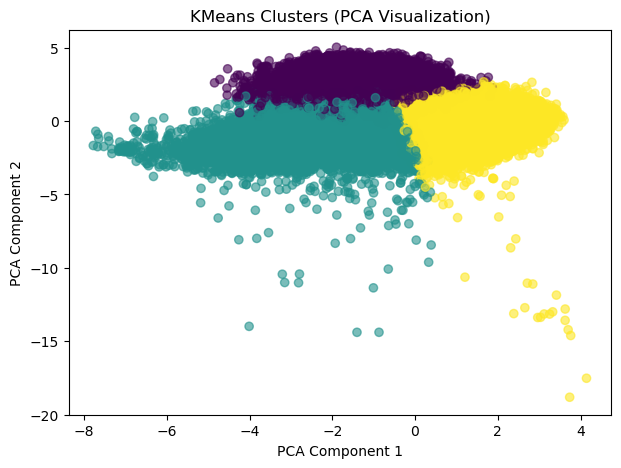

In [13]:
# Plot PCA scatter
plt.figure(figsize=(7,5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=df['kmeans_cluster'],
    alpha=0.6
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clusters (PCA Visualization)")
plt.show()

##### 9. K-MEANS EVALUATION

In [14]:
print("Silhouette Score:",
      round(silhouette_score(X_scaled, df['kmeans_cluster'], sample_size=1000, random_state=42), 4))

print("Inertia:",
      round(kmeans_final.inertia_, 2))

# Cluster size distribution
df['kmeans_cluster'].value_counts()

# Cluster profile (mean feature values)
cluster_profile = df.groupby('kmeans_cluster')[recommended_features].mean().round(3)
cluster_profile

# Top 3 dominant features per cluster
for c in cluster_profile.index:
    print(f"\nCluster {c} - Top Features:")
    print(cluster_profile.loc[c].sort_values(ascending=False).head(3))

Silhouette Score: 0.2465
Inertia: 658335.08

Cluster 0 - Top Features:
duration_ms    97520.590
tempo            100.389
speechiness        0.830
Name: 0, dtype: float64

Cluster 1 - Top Features:
duration_ms     223457.064
tempo              111.940
acousticness         0.749
Name: 1, dtype: float64

Cluster 2 - Top Features:
duration_ms    226592.053
tempo             124.911
energy              0.694
Name: 2, dtype: float64


##### 10. DBSCAN CLUSTERING

Noise points: (716, 19)
Non-noise points: (95121, 19)


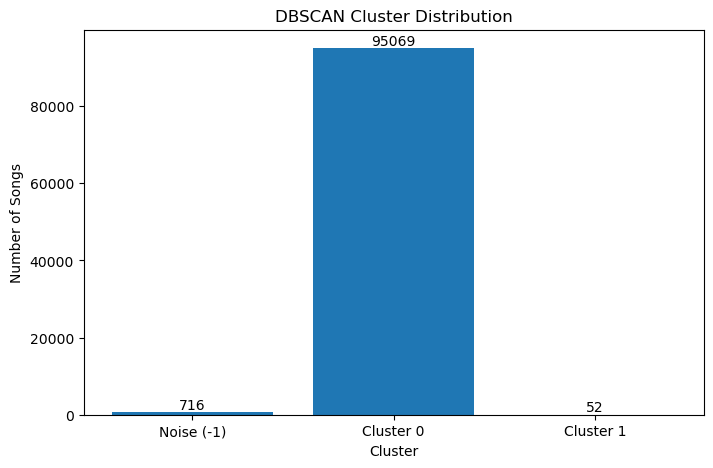

In [15]:
# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=1.8, min_samples=12)
labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels
df['db_cluster'] = labels

# Separate noise points
noise_df = df[df['db_cluster'] == -1]

print("Noise points:", noise_df.shape)
print("Non-noise points:", df[df['db_cluster'] != -1].shape)

# Cluster distribution
unique_labels, counts = np.unique(labels, return_counts=True)

label_names = [
    "Noise (-1)" if label == -1 else f"Cluster {label}"
    for label in unique_labels
]

plt.figure(figsize=(8,5))
plt.bar(label_names, counts)
plt.xlabel("Cluster")
plt.ylabel("Number of Songs")
plt.title("DBSCAN Cluster Distribution")

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

##### 11. HIERARCHICAL CLUSTERING

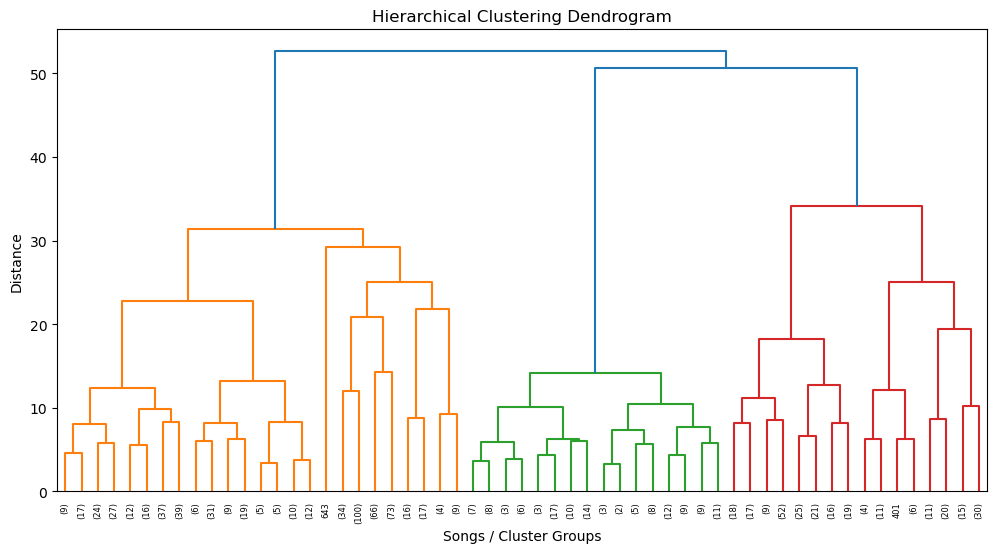

In [18]:
# Sample data for performance
X_sample_hier = X_scaled[np.random.choice(len(X_scaled), 1000, replace=False)]

# Create linkage matrix
linked = linkage(X_sample_hier, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    truncate_mode='level',
    p=5,
    color_threshold=linked[-2, 2]
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Songs / Cluster Groups")
plt.ylabel("Distance")
plt.show()

##### 12. CLUSTERING ALGORITHM COMPARISON

In [19]:
np.random.seed(42)
sample_indices = np.random.choice(len(X_scaled), size=min(10000, len(X_scaled)), replace=False)
X_metrics = X_scaled[sample_indices]

results = []

# ---- KMeans Metrics ----
kmeans_labels = df["kmeans_cluster"].values[sample_indices]

results.append({
    "Algorithm": "KMeans",
    "Silhouette Score": silhouette_score(X_metrics, kmeans_labels),
    "Davies-Bouldin Index": davies_bouldin_score(X_metrics, kmeans_labels),
    "No. of Clusters": len(np.unique(kmeans_labels)),
    "Noise %": 0.0
})

# ---- DBSCAN Metrics ----
db_sample_labels = labels[sample_indices]
core_mask = db_sample_labels != -1

if len(np.unique(db_sample_labels[core_mask])) >= 2:
    results.append({
        "Algorithm": "DBSCAN",
        "Silhouette Score": silhouette_score(X_metrics[core_mask], db_sample_labels[core_mask]),
        "Davies-Bouldin Index": davies_bouldin_score(X_metrics[core_mask], db_sample_labels[core_mask]),
        "No. of Clusters": len(np.unique(db_sample_labels[core_mask])),
        "Noise %": (np.sum(labels == -1) / len(labels)) * 100
    })

# ---- Hierarchical Metrics ----
Z = linkage(X_metrics, method='ward')
hier_labels = fcluster(Z, 3, criterion='maxclust')

results.append({
    "Algorithm": "Hierarchical",
    "Silhouette Score": silhouette_score(X_metrics, hier_labels),
    "Davies-Bouldin Index": davies_bouldin_score(X_metrics, hier_labels),
    "No. of Clusters": len(np.unique(hier_labels)),
    "Noise %": 0.0
})

In [20]:
# Final comparison table
df_comparison = pd.DataFrame(results)
df_comparison

,Algorithm,Silhouette Score,Davies-Bouldin Index,No. of Clusters,Noise %
0,KMeans,0.237789,1.575448,3,0.000000
1,DBSCAN,0.705506,0.318459,2,0.747102
2,Hierarchical,0.143412,1.905686,3,0.000000


##### 13. EXPORT FINAL RESULTS

In [21]:
df.to_csv('amazon_music_final_clusters.csv', index=False)
print("Final dataset saved successfully!")

Final dataset saved successfully!


##### 14. BEST CLUSTERING ALGORITHM SELECTION

In [24]:
# Goal:
# Automatically identify the best clustering algorithm
# using quantitative evaluation metrics.

# ---------------------------------------------
# Step 1: Select best model based on Silhouette Score
# (Higher value → better cluster separation)
best_by_silhouette = df_comparison.loc[
    df_comparison['Silhouette Score'].idxmax()
]

# ---------------------------------------------
# Step 2: Select best model based on Davies-Bouldin Index
# (Lower value → better cluster compactness)
best_by_db_index = df_comparison.loc[
    df_comparison['Davies-Bouldin Index'].idxmin()
]

print("!!! BEST CLUSTERING ALGORITHM SELECTION !!!")

# ---------------------------------------------
# Step 3: Check if both metrics agree on the same algorithm
if best_by_silhouette['Algorithm'] == best_by_db_index['Algorithm']:

    # Both metrics agree → definitive winner
    winner = best_by_silhouette['Algorithm']
    print(f"\nThe Definitive Best Algorithm is: {winner}")

    # Print justification
    print("Justification:")
    print(
        f" * Highest Silhouette Score: "
        f"{best_by_silhouette['Silhouette Score']:.4f} "
        "(Closer to 1 indicates better-defined clusters)"
    )
    print(
        f" * Lowest Davies-Bouldin Index: "
        f"{best_by_silhouette['Davies-Bouldin Index']:.4f} "
        "(Closer to 0 indicates compact and well-separated clusters)"
    )

    # -----------------------------------------
    # Step 4: Display DBSCAN noise handling (if available)
    noise_value = df_comparison.loc[
        df_comparison['Algorithm'] == 'DBSCAN', 'Noise %'
    ].values

    if len(noise_value) > 0:
        print(
            f" * Noise Handling: DBSCAN identified "
            f"{noise_value[0]:.2f}% of songs as outliers."
        )

else:
    # Metrics disagree → highlight trade-off
    print("\nMetrics are split between algorithms:")
    print(
        f" * Best by Silhouette Score: "
        f"{best_by_silhouette['Algorithm']}"
    )
    print(
        f" * Best by Davies-Bouldin Index: "
        f"{best_by_db_index['Algorithm']}"
    )

    print(
        "\nInterpretation: "
        "One algorithm shows better separation, "
        "while another shows better compactness."
    )

!!! BEST CLUSTERING ALGORITHM SELECTION !!!

The Definitive Best Algorithm is: DBSCAN
Justification:
 * Highest Silhouette Score: 0.7055 (Closer to 1 indicates better-defined clusters)
 * Lowest Davies-Bouldin Index: 0.3185 (Closer to 0 indicates compact and well-separated clusters)
 * Noise Handling: DBSCAN identified 0.75% of songs as outliers.
